In [37]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd

In [38]:
CG = pickle.load(open('data/location/IL_graph.dat', 'rb'))
handler = pickle.load(open('data/location/graph_handler.dat', 'rb'))

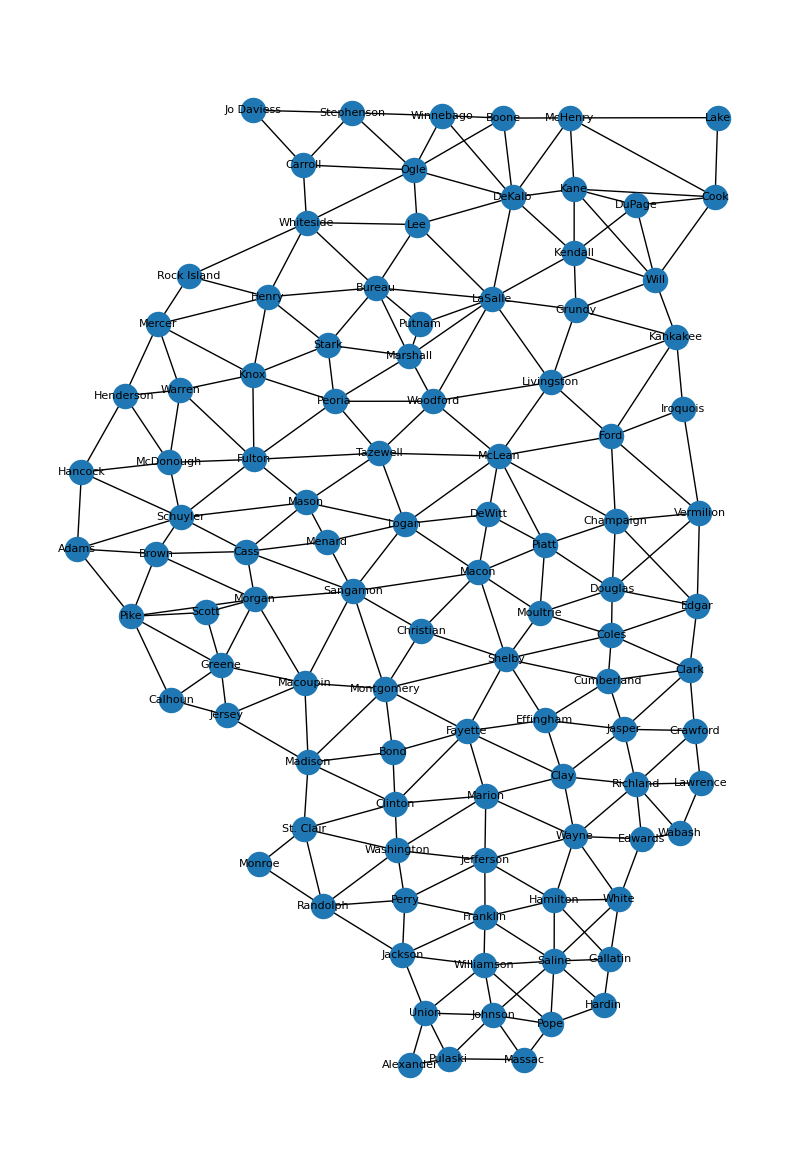

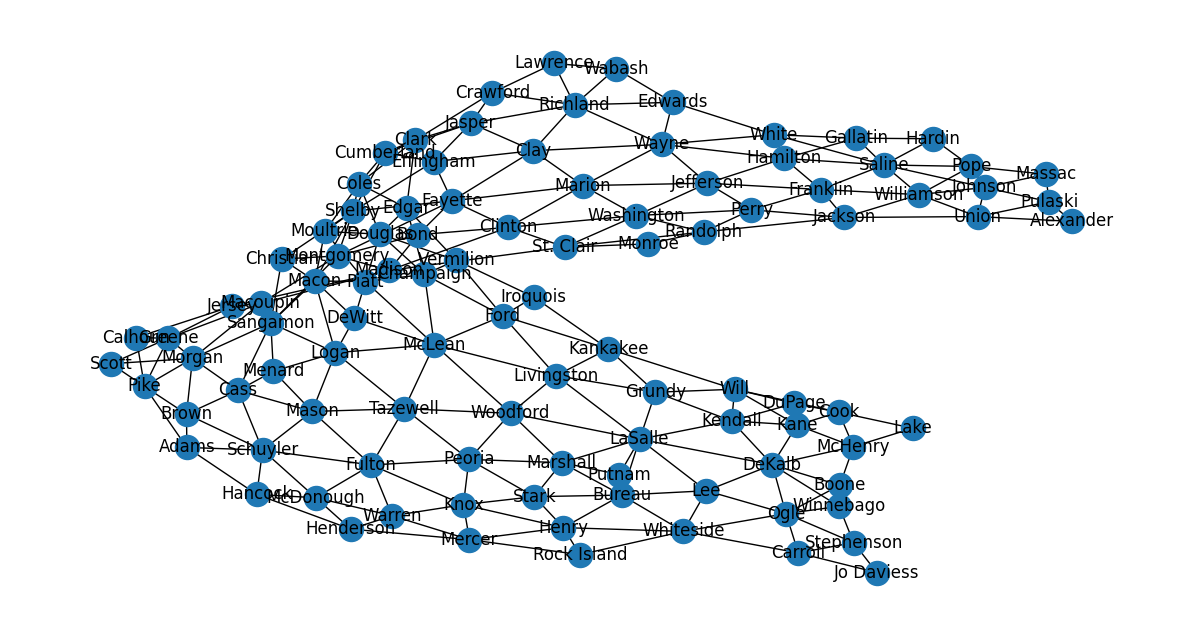

In [61]:
labels = {node: handler[node.name].name for node in CG.nodes()}
fig, ax = plt.subplots(figsize=(10, 15))
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
nx.draw(CG, pos=node_positions, ax=ax)
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=8, ax=ax)

  # Do we need this one anymore?
fig, ax = plt.subplots(figsize=(15,8))
G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
nx.draw(G, with_labels=True)
plt.show()

<Axes: >

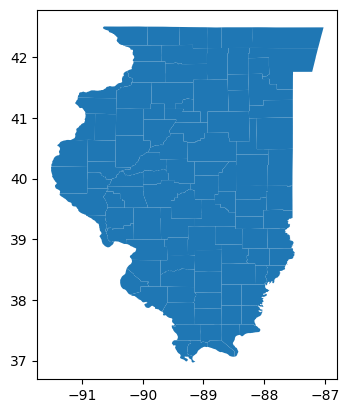

In [17]:
gdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})
gdf.plot()

Test = County(0, 0, 0, 100, 'Test')
print(Test)

In [18]:
counties_set = set(counties['origin'])  # Using set to remove redundancies

In [19]:
population_dict = open('data/county_populations.json', 'r')
counties_population = json.load(population_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'data/county_populations.json'

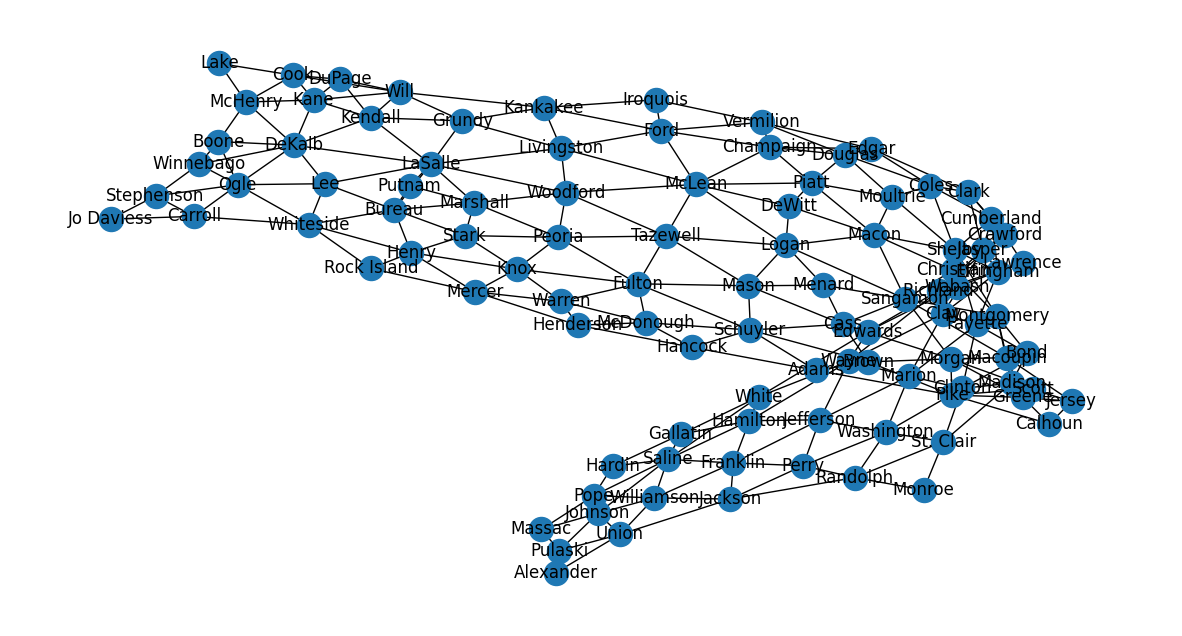

In [20]:
counties = pd.read_csv('data/location/county_edges.csv')

fig, ax = plt.subplots(figsize=(15,8))
G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
nx.draw(G, with_labels=True)
plt.show()

Well it doesn't LOOK like illinois... 

In [31]:
pos = {}
for node in CG:
    centroid_seq = [node.centroid.x, node.centroid.y]
    pos[node.name] = centroid_seq
print(pos)
#     print(dir(node))

{'Cook': [-87.64586901591329, 41.89561310747977], 'DuPage': [-88.085616963798, 41.85194801392289], 'Kane': [-88.42863661892792, 41.93886261834667], 'Will': [-87.97867967240714, 41.44509773689722], 'Winnebago': [-89.16070533167691, 42.33635592181084], 'Lake': [-87.6313759704985, 42.32535780853905], 'McHenry': [-88.45200657445464, 42.32437130588661], 'St. Clair': [-89.92946232240219, 38.47086425121318], 'Kendall': [-88.42888400201146, 41.59054429726196], 'Madison': [-89.90550979335477, 38.83004600326634], 'Rock Island': [-90.56865610678791, 41.46667462032028], 'Peoria': [-89.75951031476144, 40.787963673970665], 'Sangamon': [-89.65849034146721, 39.75840151903358], 'Tazewell': [-89.51302227852823, 40.50735019305933], 'Champaign': [-88.19916906815091, 40.14010766940202], 'Boone': [-88.82310643639968, 42.32302838815382], 'Macon': [-88.96160816308206, 39.85999913635151], 'Kankakee': [-87.8617199796, 41.137683870010676], 'DeKalb': [-88.77027566544997, 41.893526751803165], 'Williamson': [-88.92